In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('datasets\Boston_Housing.xlsx - Data.csv')

### Explore the dataset -

Data Dictionary:

- CRIM - per capita crime rate by town
- ZN - the proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - the proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - the average number of rooms per dwelling
- AGE - the proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centers
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [25]:
df.shape[0]

506

In [26]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296,15.3,396.9,4.98,24.0
1,0.02731,0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.9,9.14,21.6
2,0.02729,0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.9,5.33,36.2


In [27]:
desc = pd.DataFrame(index = list(df))
desc['count'] = df.count()
desc['nunique'] = df.nunique()
desc['%unique'] = desc['nunique'] / len(df) * 100
desc['null'] = df.isnull().sum()
desc['type'] = df.dtypes
desc = pd.concat([desc, df.describe().T.drop('count', axis = 1)], axis = 1)
desc

,count,nunique,%unique,null,type,mean,std,min,25%,50%,75%,max
CRIM,504,502,99.209486,2,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZN,500,27,5.335968,6,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INDUS,498,79,15.612648,8,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHAS,498,2,0.395257,8,float64,0.070281,0.255877,0.000,0.0000,0.0000,0.000,1.00
NOX,500,82,16.205534,6,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RM,504,445,87.944664,2,float64,6.286185,0.702596,3.561,5.8865,6.2085,6.626,8.78
AGE,499,354,69.960474,7,float64,68.459118,28.190158,2.900,44.7000,77.3000,94.050,100.00
DIS,497,404,79.841897,9,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RAD,502,9,1.778656,4,float64,9.434263,8.645298,1.000,4.0000,5.0000,24.000,24.00
TAX,500,67,13.241107,6,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Deal with the null and the noise values in different columns.

In [28]:
df['CRIM'] = pd.to_numeric(df['CRIM'], errors='coerce')
df['ZN'] = pd.to_numeric(df['ZN'], errors='coerce')
df['INDUS'] = pd.to_numeric(df['INDUS'], errors='coerce')
df['CHAS'] = pd.to_numeric(df['CHAS'], errors='coerce')
df['NOX'] = pd.to_numeric(df['NOX'], errors='coerce')
df['RM'] = pd.to_numeric(df['RM'], errors='coerce')
df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')
df['DIS'] = pd.to_numeric(df['DIS'], errors='coerce')
df['RAD'] = pd.to_numeric(df['RAD'], errors='coerce')
df['TAX'] = pd.to_numeric(df['TAX'], errors='coerce')
df['PTRATIO'] = pd.to_numeric(df['PTRATIO'], errors='coerce')
df['B'] = pd.to_numeric(df['B'], errors='coerce')
df['LSTAT'] = pd.to_numeric(df['LSTAT'], errors='coerce')
df['MEDV'] = pd.to_numeric(df['MEDV'], errors='coerce')

In [29]:
df = df.dropna()

In [30]:
df.shape[0]

465

Check the data types of each column.

In [31]:
desc = pd.DataFrame(index = list(df))
desc['count'] = df.count()
desc['nunique'] = df.nunique()
desc['%unique'] = desc['nunique'] / len(df) * 100
desc['null'] = df.isnull().sum()
desc['type'] = df.dtypes
desc = pd.concat([desc, df.describe().T.drop('count', axis = 1)], axis = 1)
desc

,count,nunique,%unique,null,type,mean,std,min,25%,50%,75%,max
CRIM,465,463,99.569892,0,float64,3.435569,8.160696,0.00632,0.07978,0.25199,3.32105,88.9762
ZN,465,26,5.591398,0,float64,11.779570,23.846228,0.00000,0.00000,0.00000,12.50000,100.0000
INDUS,465,76,16.344086,0,float64,11.056065,6.948692,0.46000,5.13000,8.56000,18.10000,27.7400
CHAS,465,2,0.430108,0,float64,0.070968,0.257047,0.00000,0.00000,0.00000,0.00000,1.0000
NOX,465,81,17.419355,0,float64,0.551692,0.116687,0.38500,0.44800,0.52400,0.62400,0.8710
RM,465,416,89.462366,0,float64,6.291531,0.700496,3.56100,5.88900,6.21600,6.62500,8.7800
AGE,465,331,71.182796,0,float64,68.181720,28.574649,2.90000,42.60000,77.70000,94.30000,100.0000
DIS,465,377,81.075269,0,float64,3.868029,2.148163,1.12960,2.07200,3.37510,5.28730,12.1265
RAD,465,9,1.935484,0,float64,9.326882,8.584558,1.00000,4.00000,5.00000,8.00000,24.0000
TAX,465,66,14.193548,0,float64,404.178495,167.196858,187.00000,279.00000,330.00000,666.00000,711.0000


Find the 5-point summary of the numerical columns.

In [36]:
five_point_summary = df.describe()
five_point_summary

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,3.435569,11.779570,11.056065,0.070968,0.551692,6.291531,68.181720,3.868029,9.326882,404.178495,18.412688,355.732645,12.600108,22.620430
std,8.160696,23.846228,6.948692,0.257047,0.116687,0.700496,28.574649,2.148163,8.584558,167.196858,2.140192,92.673993,7.261301,9.316034
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.079780,0.000000,5.130000,0.000000,0.448000,5.889000,42.600000,2.072000,4.000000,279.000000,17.000000,374.710000,6.780000,17.000000
50%,0.251990,0.000000,8.560000,0.000000,0.524000,6.216000,77.700000,3.375100,5.000000,330.000000,18.700000,391.250000,11.220000,21.200000
75%,3.321050,12.500000,18.100000,0.000000,0.624000,6.625000,94.300000,5.287300,8.000000,666.000000,20.200000,396.210000,17.110000,25.100000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Create a correlation heatmap to check the correlation of different variables with each other.

In [39]:
corr_mat = df.corr()

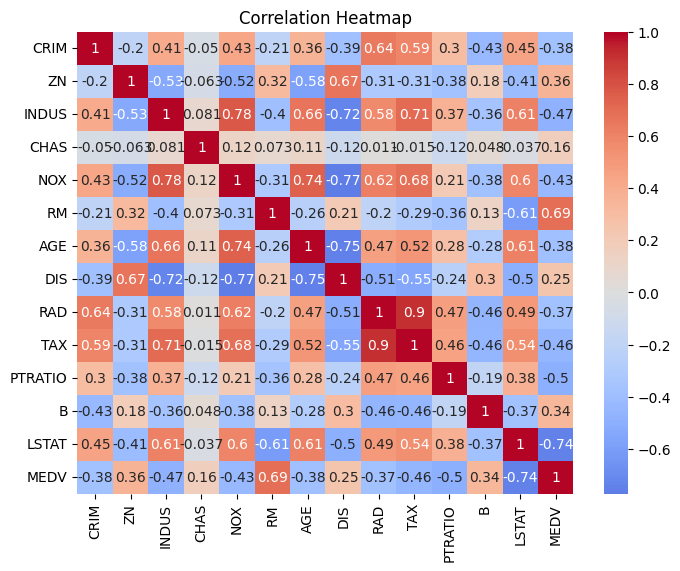

In [40]:
# Create a correlation heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

### Create a scatter plot of the target variable (median value of owner-occupied homes) against the variable "average number of rooms per dwelling”.

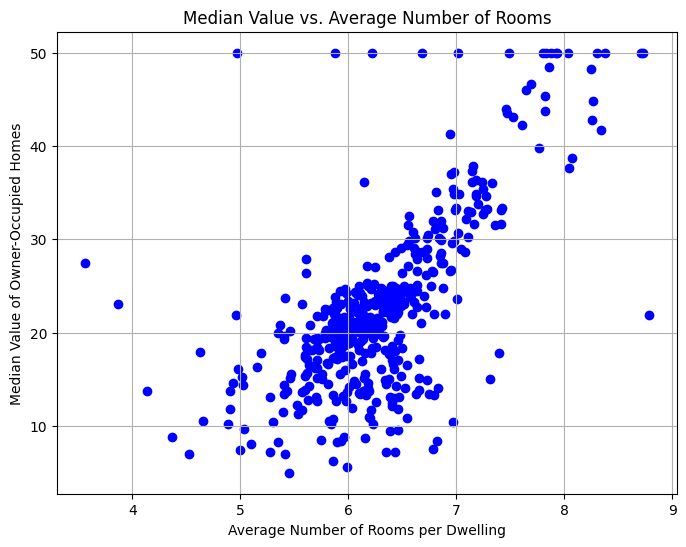

In [42]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['RM'], df['MEDV'], color='blue', marker='o')
plt.title('Median Value vs. Average Number of Rooms')
plt.xlabel('Average Number of Rooms per Dwelling')
plt.ylabel('Median Value of Owner-Occupied Homes')
plt.grid(True)
plt.show()

### Find the count of rows which have the MEDV greater than 20

In [43]:
df.loc[df['MEDV'] > 20].shape[0]

268

### Find the standard Deviation of the age column.

In [45]:
df['AGE'].std()

28.574648707514832